<ipython-input-39-279d49c4fa89>:8: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  simg = np.zeros((m, n), np.signedinteger)


148 163


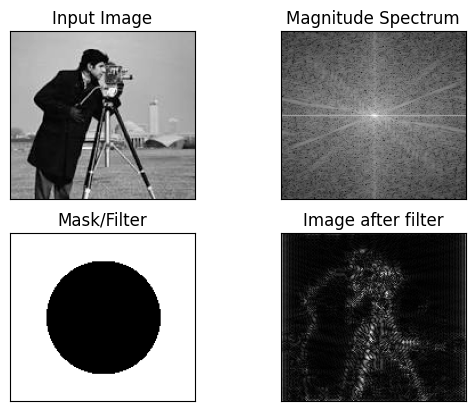

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/cameraman.jpg',0)

[m,n]=img.shape
simg = np.zeros((m, n), np.signedinteger)
print(m,n)

for i in range(m):
  for j in range(n):
    simg[i,j]=img[i,j]*(-1)**(i+j)


f = np.fft.fft2(simg)
#fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(f))

radius = 50  # Adjust radius for the level of blur
mask = np.zeros((m, n), np.uint8)
for i in range(m):
    for j in range(n):
        # Calculate the Euclidean distance to the top-left corner (0, 0)
        distance = np.sqrt((i - m/2)**2 + (j - n/2)**2)
        if distance > radius:
            mask[i, j] = 1



f_filtered = f * mask

# Inverse Fourier Transform to get back the blurred image
img_back = np.fft.ifft2(f_filtered)
img_back = np.abs(img_back)

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(mask, cmap = 'gray')
plt.title('Mask/Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after filter'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-35-8418476e4405>:8: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  simg = np.zeros((m, n), np.signedinteger)


148 163


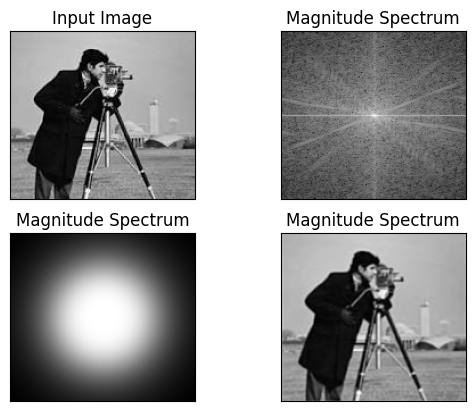

In [ ]:


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/cameraman.jpg',0)

[m,n]=img.shape
simg = np.zeros((m, n), np.signedinteger)
print(m,n)

for i in range(m):
  for j in range(n):
    simg[i,j]=img[i,j]*(-1)**(i+j)


f = np.fft.fft2(simg)
#fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(f))



D0 = 50  # Cutoff frequency
R = 2    # Order of the Butterworth filter

# Create the Butterworth filter
H = np.zeros((m, n))
for u in range(m):
    for v in range(n):
        # Calculate distance from each point to the top-left corner (origin)
        D = np.sqrt((u - m/2)**2 + (v - n/2)**2)
        H[u, v] = 1 / (1 + (D / D0)**(2 * R))


f_filtered = f * H

# Inverse Fourier Transform to get back the blurred image
img_back = np.fft.ifft2(f_filtered)
img_back = np.abs(img_back)

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(H, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

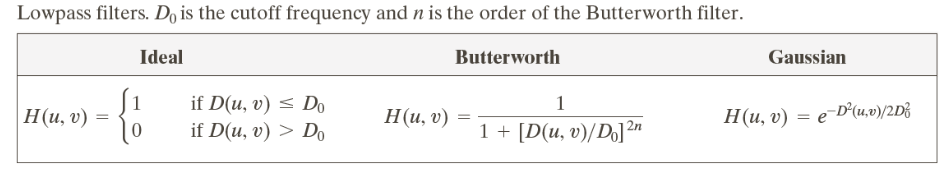

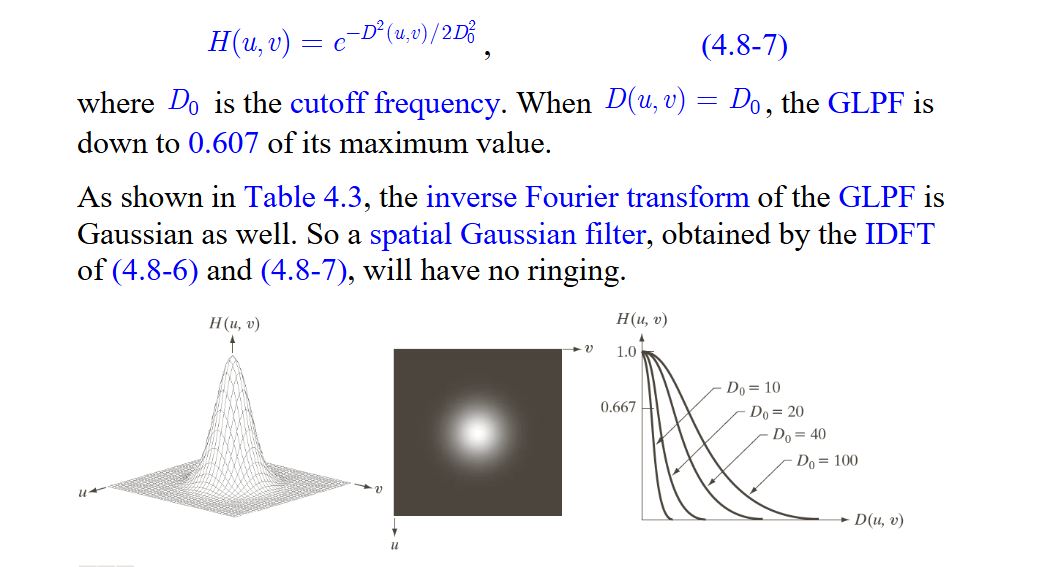